In [1]:
%%capture
cd ..

# Log your project

## File system logger



In [2]:
import os

from tempfile import gettempdir
import pandas as pd
from sklearn import model_selection
from sklearn.datasets import make_classification
from palma import Project, ModelSelector, ModelEvaluation
from palma import components
from palma import set_logger, logger
from palma.datasets import load_credit_approval


set_logger(components.FileSystemLogger(f'{gettempdir()}/logger'))

X, y = load_credit_approval()
project = Project(problem="classification", project_name="test")
project.start(
    X, y,
    splitter=model_selection.ShuffleSplit(n_splits=10, random_state=42),
)
print(os.listdir(f'{logger.uri}/{project.project_name}/{project.date}'))


['project.pkl', 'properties.json']


## mlflow logger

In [3]:
set_logger(components.MLFlowLogger('./.mlruns'))

In [4]:
X, y = load_credit_approval()

project = Project(problem="classification", project_name="test")
project.start(
    X, y,
    splitter=model_selection.ShuffleSplit(n_splits=10, random_state=42),
)

Traceback (most recent call last):
  File "/home/vlaurent/Project/tools/palma/venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 302, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
  File "/home/vlaurent/Project/tools/palma/venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 395, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
  File "/home/vlaurent/Project/tools/palma/venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 1303, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
  File "/home/vlaurent/Project/tools/palma/venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 1296, in _read_helper
    result = read_yaml(root, file_name)
  File "/home/vlaurent/Project/tools/palma/venv/lib/python3.10/site-packages/mlflow/utils/file_utils.py", line 303, in read_yaml
    raise MissingConfigEx

In [5]:
model = ModelSelector(engine="FlamlOptimizer",
                      engine_parameters=dict(time_budget=20))
model.start(project)

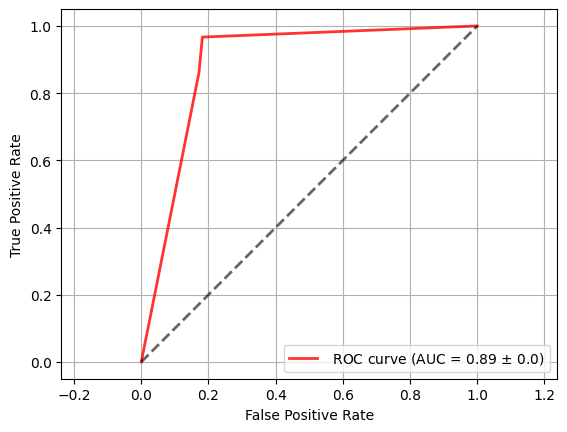

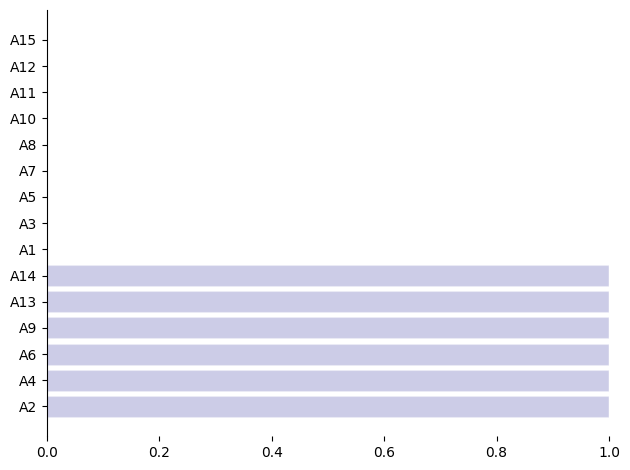

In [6]:
import matplotlib.pyplot as plt
evaluation = ModelEvaluation(model.best_model_)
evaluation.add(components.ScoringAnalysis(on="indexes_train_test"))
evaluation.fit(project)
evaluation.components["ScoringAnalysis"].plot_roc_curve()
plt.figure()
evaluation.components["ScoringAnalysis"].plot_variable_importance()